# Assignment 2: Projective Transformation and Stereo Matching

Spring 2021: Computer Vision  
Indiana University, Bloomington  
Submission by: Nicholas Faro, Ketan Pimparkar, Rose Mariyappan, Sahil Tyagi, Aakash Ahuja  

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path

In [8]:
class StereoMatch:
    """
    Class to perform stereo matching
    """
    def __init__(self, img_location, left_image, right_image, GT_disparity_match):
        """
        Constructor class
        - Load images
        - Get image arrays and array dimensions
        """
        self.img_location = img_location
        self.left_image = Path(img_location, left_image)
        self.right_image = Path(img_location, right_image)
        self.GT_disparity_match = Path(img_location, GT_disparity_match)
        
        self.li_mat = np.array(Image.open(self.left_image)).astype(int)
        self.ri_mat = np.array(Image.open(self.right_image)).astype(int)
        self.gt_mat = np.array(Image.open(self.GT_disparity_match)).astype(int)
        
        self.l_height, self.l_width, self.l_channel = self._ret_image_matrix_dimenstions(self.li_mat)
        self.r_height, self.r_width, self.r_channel = self._ret_image_matrix_dimenstions(self.ri_mat)
        self.gt_height, self.gt_width, self.gt_channel = self._ret_image_matrix_dimenstions(self.gt_mat)
        
        print("------------------------------ Images are loaded ------------------------------")
        print(f"Left image: {self.left_image} with HxWxC: {self.l_height}x{self.l_width}x{self.l_channel}")
        print(f"Right image: {self.right_image} with HxWxC: {self.r_height}x{self.r_width}x{self.r_channel}")
        print(f"Ground Truth disparity match: {self.GT_disparity_match} with HxWxC: {self.gt_height}x{self.gt_width}x{self.gt_channel}")
        
    def _ret_image_matrix_dimenstions(self, img_mat):     
        if len(img_mat.shape) == 3:
            height, width, channel = img_mat.shape 
            return height, width, channel
        else:
            height, width = img_mat.shape 
            return height, width, None 
    
    def show_input_images(self):
        fig = plt.figure(figsize =(15, 10))
        plt.subplot(121)
        plt.title("Left Image")
        plt.imshow(self.li_mat)
        plt.subplot(122)
        plt.title("Right Image")
        plt.imshow(self.ri_mat)
        plt.show()
       
    def calc_disparity_mat(self, pixel_size=10, search_range=100):
        """
        Calculate disparity matrix D_mat
        - pixel_size is the patch size, default = 10
        - search_range is number of pixels to search, default = 100 
        """
        D_mat = np.zeros((self.r_height, self.r_width))
        for i in range(self.l_height-pixel_size):
            for j in range(self.l_width-pixel_size):
                min_distance = 99999999
                min_k = max(0, j-search_range)
                max_k = min(self.r_width-pixel_size, j+search_range-pixel_size)
                for k in range(min_k, max_k):
                    distance = np.sum(np.abs(self.ri_mat[i:i+pixel_size,k:k+pixel_size] - self.li_mat[i:i+pixel_size,j:j+pixel_size]))
                    if distance < min_distance:
                        min_distance = distance
                        D_mat[i,j] = abs(k - j)
#         print("D_mat ", D_mat.shape, D_mat)
        return D_mat
    
    def show_compare_results(self, D_mat):
        fig = plt.figure(figsize =(15, 10))
        plt.subplot(121)
        plt.title("Predicted Disparity")
        plt.imshow(D_mat)
        plt.subplot(122)
        plt.title("Ground Truth")
        plt.imshow(self.gt_mat)
        plt.show()
    
    def calc_evaluation_metric(self, D_mat):
        """
        Evaluation metrics
        """
        E_epe = 0
        E_3px = 0
        E_3px_rate = 0

        # end point error
        E_epe = np.sum(np.abs(D_mat - self.gt_mat)) / (self.gt_height * self.gt_width)

        # error rate
        for i in range(self.gt_height):
            for j in range(self.gt_width):
                if np.abs(D_mat[i,j] - self.gt_mat[i,j]) > 3:
                    E_3px += 1
        E_3px_rate = 100 * (E_3px / (self.gt_height * self.gt_width))

        print("End Point Error = ", round(E_epe, 5), "Error Rate = ", round(E_3px_rate, 5))


In [19]:
# Define input image details

input_images = {
    "img1": {
            "location":"./input_images/part2/1",
            "left_image" : "0015_rgb_left.png",
            "right_image" : "0015_rgb_right.png",
            "gt_image" : "0015_gt.png",
    },
    "img2": {
            "location":"./input_images/part2/2",
            "left_image" : "0011_rgb_left.png",
            "right_image" : "0011_rgb_right.png",
            "gt_image" : "0011_gt.png",       
    },
    "img3": {
            "location":"./input_images/part2/3",
            "left_image" : "0008_rgb_left.png",
            "right_image" : "0008_rgb_right.png",
            "gt_image" : "0008_gt.png",       
    },
    "img4": {
            "location":"./input_images/part2/4",
            "left_image" : "0006_rgb_left.png",
            "right_image" : "0006_rgb_right.png",
            "gt_image" : "0006_gt.png",       
    },   
}
    


========================== Performing stereo match on img1 ==========================

------------------------------ Images are loaded ------------------------------
Left image: input_images/part2/1/0015_rgb_left.png with HxWxC: 540x960x3
Right image: input_images/part2/1/0015_rgb_right.png with HxWxC: 540x960x3
Ground Truth disparity match: input_images/part2/1/0015_gt.png with HxWxC: 540x960xNone
------------------------------ Input Images ------------------------------


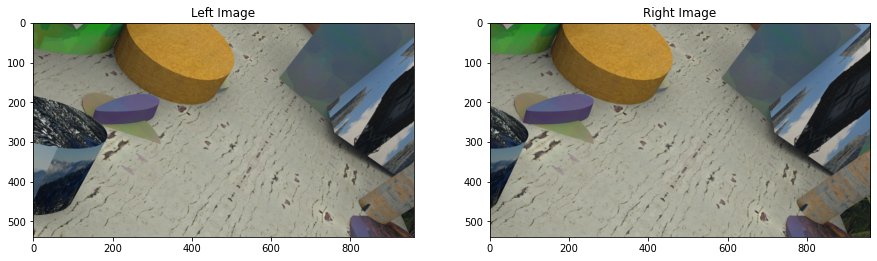

-------------------------- Calculate Disparity ---------------------------


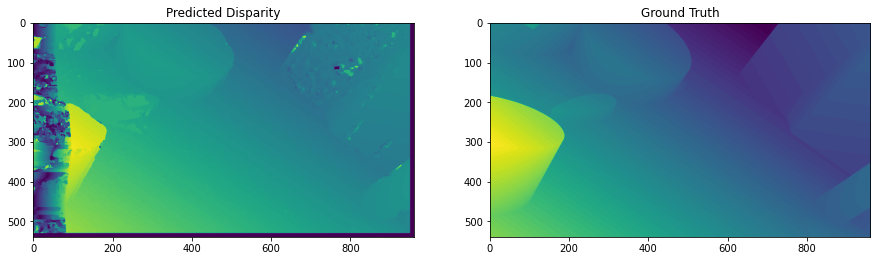

---------------------- Calculate Evaluation Metrics ----------------------
End Point Error =  6.3775 Error Rate =  13.88194

========================== Performing stereo match on img2 ==========================

------------------------------ Images are loaded ------------------------------
Left image: input_images/part2/2/0011_rgb_left.png with HxWxC: 540x960x3
Right image: input_images/part2/2/0011_rgb_right.png with HxWxC: 540x960x3
Ground Truth disparity match: input_images/part2/2/0011_gt.png with HxWxC: 540x960xNone
------------------------------ Input Images ------------------------------


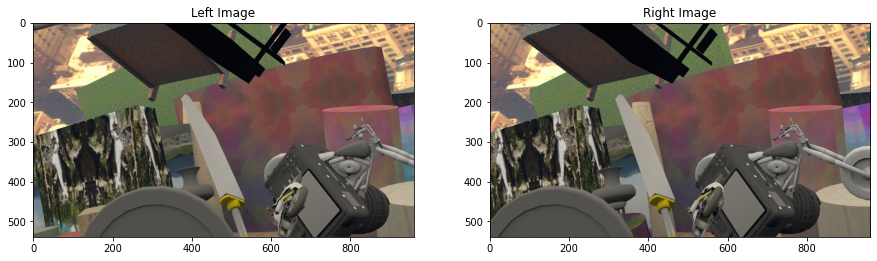

-------------------------- Calculate Disparity ---------------------------


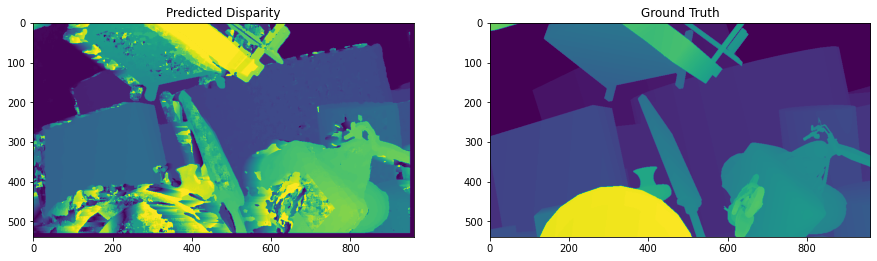

---------------------- Calculate Evaluation Metrics ----------------------
End Point Error =  15.61004 Error Rate =  35.64738

========================== Performing stereo match on img3 ==========================

------------------------------ Images are loaded ------------------------------
Left image: input_images/part2/3/0008_rgb_left.png with HxWxC: 540x960x3
Right image: input_images/part2/3/0008_rgb_right.png with HxWxC: 540x960x3
Ground Truth disparity match: input_images/part2/3/0008_gt.png with HxWxC: 540x960xNone
------------------------------ Input Images ------------------------------


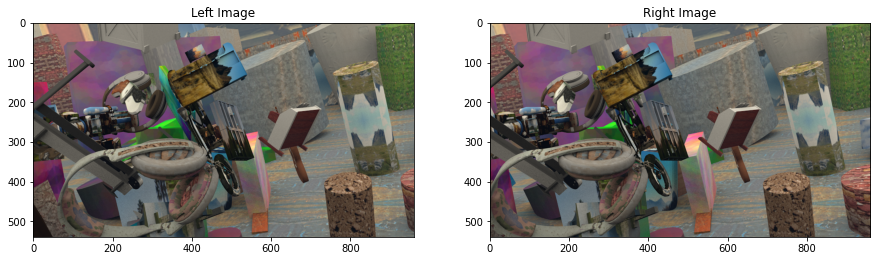

-------------------------- Calculate Disparity ---------------------------


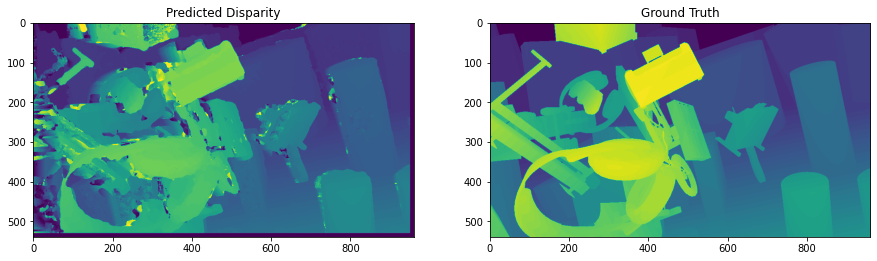

---------------------- Calculate Evaluation Metrics ----------------------
End Point Error =  7.48113 Error Rate =  26.77469

========================== Performing stereo match on img4 ==========================

------------------------------ Images are loaded ------------------------------
Left image: input_images/part2/4/0006_rgb_left.png with HxWxC: 540x960x3
Right image: input_images/part2/4/0006_rgb_right.png with HxWxC: 540x960x3
Ground Truth disparity match: input_images/part2/4/0006_gt.png with HxWxC: 540x960xNone
------------------------------ Input Images ------------------------------


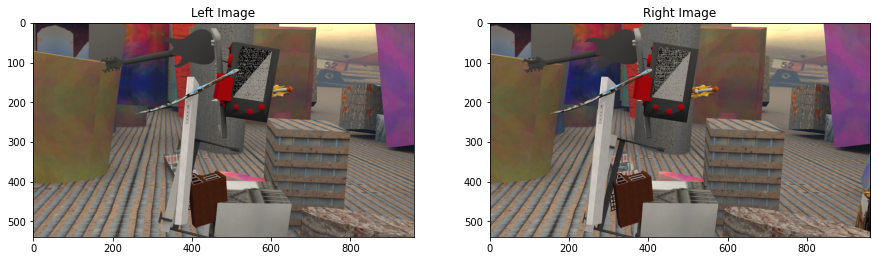

-------------------------- Calculate Disparity ---------------------------


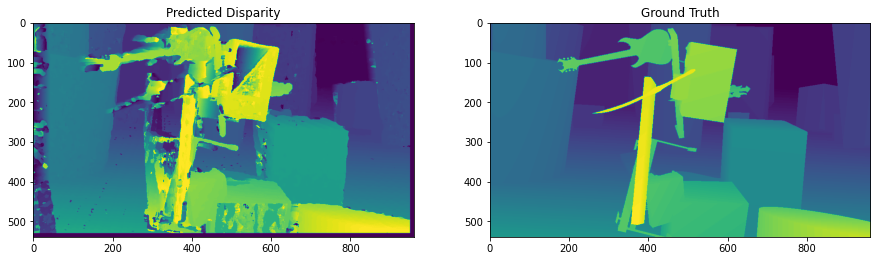

---------------------- Calculate Evaluation Metrics ----------------------
End Point Error =  10.01937 Error Rate =  28.97801


In [20]:
for img, details in input_images.items():
    print(f"\n========================== Performing stereo match on {img} ==========================\n")
    location = details["location"]
    left_image = details["left_image"]
    right_image = details["right_image"]
    gt_image = details["gt_image"]
    
    StereoMatch_img = StereoMatch(location, left_image, right_image, gt_image)
    
    print("------------------------------ Input Images ------------------------------")
    StereoMatch_img.show_input_images()
    
    print("-------------------------- Calculate Disparity ---------------------------")
    disparity_mat = StereoMatch_img.calc_disparity_mat()
    StereoMatch_img.show_compare_results(disparity_mat)
    
    print("---------------------- Calculate Evaluation Metrics ----------------------")
    StereoMatch_img.calc_evaluation_metric(disparity_mat)
    